# How well do jobs and skills pay for Data Analysts?

### Methodology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load data, Author: Luke Barousse, Site: Hugging Face
df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

# Data Cleanup (job_skills to list and dates with correct format)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_mexico = df[(df['job_country']=='Mexico')].dropna(subset=['salary_year_avg']).copy()

In [4]:
#Get top 6 job titles in Mexico
job_titles = df_mexico['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Analyst',
 'Data Scientist',
 'Data Engineer',
 'Senior Data Engineer',
 'Senior Data Scientist',
 'Software Engineer']

In [5]:
df_mexico_top6 = df_mexico[df_mexico['job_title_short'].isin(job_titles)].copy()

In [11]:
# Find the median salary for the top 6 data jobs in Mexico
job_order = df_mexico_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Engineer',
       'Software Engineer', 'Data Scientist', 'Data Analyst'],
      dtype='object', name='job_title_short')

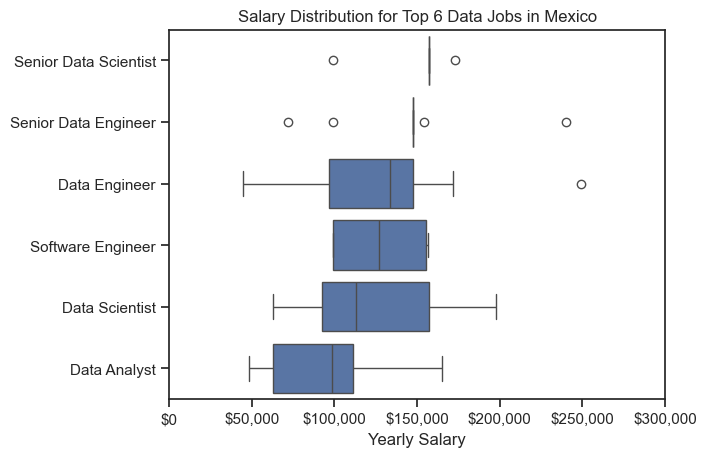

In [13]:
sns.boxplot(data=df_mexico_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution for Top 6 Data Jobs in Mexico')
plt.xlabel('Yearly Salary')
plt.ylabel('')
plt.xlim(0, 300000)
plt.gca().xaxis.set_major_formatter('${x:,.0f}')